In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import timeit
import sys
from numpy import linalg as LA

np.set_printoptions(threshold=sys.maxsize)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def boundary(f, n):
    
    # Boundary conditions

    # Top
    f[0, :(n // 4)] = np.arange(13, 5, -(13 - 5) / (n // 4))
    f[1, :(n // 4)] = np.arange(13, 5, -(13 - 5) / (n // 4))

    f[:2, (n // 4):(3 * n // 4)] = 5

    f[0, (3 * n // 4):] = np.arange(5, 13, (13 - 5) / (n // 4))
    f[1, (3 * n // 4):] = np.arange(5, 13, (13 - 5) / (n // 4))

    # Bottom
    f[n-2:, :] = 21

    # Left
    f[:(3 * n // 8), 0] = np.arange(13, 40, ((40 - 13) / (3 * n // 8)))
    f[:(3 * n // 8), 1] = np.arange(13, 40, ((40 - 13) / (3 * n // 8)))

    f[(n // 2):, 0] = np.arange(40, 21, -((40 - 21) / (n // 2)))
    f[(n // 2):, 1] = np.arange(40, 21, -((40 - 21) / (n // 2)))

    # Right

    f[:(n // 2), -1] = np.arange(13, 40, ((40 - 13) / (n // 2)))
    f[:(n // 2), -2] = np.arange(13, 40, ((40 - 13) / (n // 2)))

    f[(5 * n // 8):, -1] = np.arange(40, 21, -((40 - 21) / (3 * n // 8)))
    f[(5 * n // 8):, -2] = np.arange(40, 21, -((40 - 21) / (3 * n // 8)))

    # Heater
    f[(3 * n // 8):(n // 2) + 1, :(n // 8 + 1)] = 40

    f[(n // 2):(5 * n // 8) + 1, -(n // 8 + 1):] = 40

In [3]:
def Grid_with_BC(n):

    #grid
    f = np.zeros((n, n))

    boundary(f, n)

    return f

In [4]:
# Initialization
def initgrid(n):
    
    #grid
    f = np.random.randn(n, n)

    boundary(f, n)

    return f

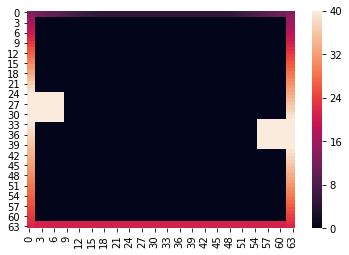

In [5]:
A = Grid_with_BC(64)

# Visualizing the problem
sn.heatmap(A)
plt.show()

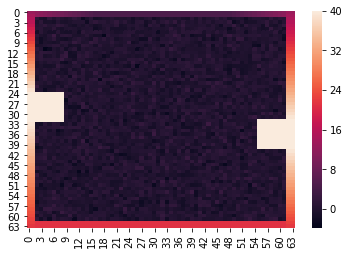

In [6]:
# Initialization
b = initgrid(64)

# Visualizing the problem
sn.heatmap(b)
plt.show()

In [7]:
def jacobi_step(T):

    m, n = T.shape

    _T = np.copy(T)

    # iterate over interior

    for i in range(2, m-1):
        for j in range(2, n-1):

            _T[i, j] = (T[i+1, j] + T[i-1, j] + T[i, j-1] + T[i, j+1]) / 4
    
    boundary(_T, n)
    
    return _T

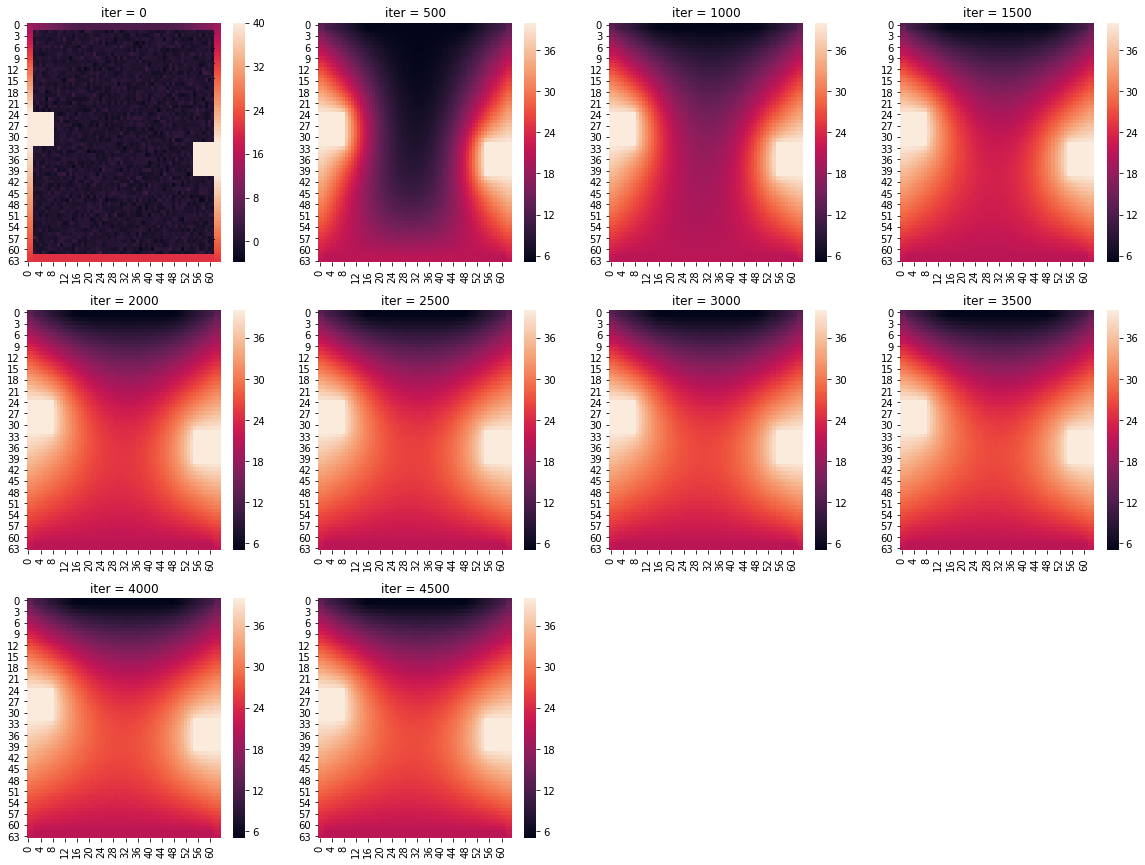

In [8]:
x = initgrid(64)

plt.figure(figsize=(20, 15))

for i in range(5000):    
    if i % 500 == 0:
        plt.subplot(3, 4,i/500+1)
        sn.heatmap(x)
        plt.title('iter = %s' % i)
        
    x = jacobi_step(x)

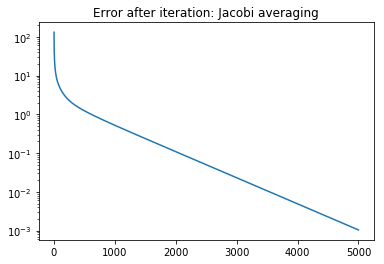

In [9]:
x_init = initgrid(64)

err_jacobi = []

for i in range(5000):    
            
    x = jacobi_step(x_init)
    err_jacobi.append((i, np.linalg.norm(x - x_init)))
    x_init = x

err_jacobi = np.array(err_jacobi)
    
plt.semilogy(err_jacobi[:, 0],err_jacobi[:, 1])
plt.title('Error after iteration: Jacobi averaging');

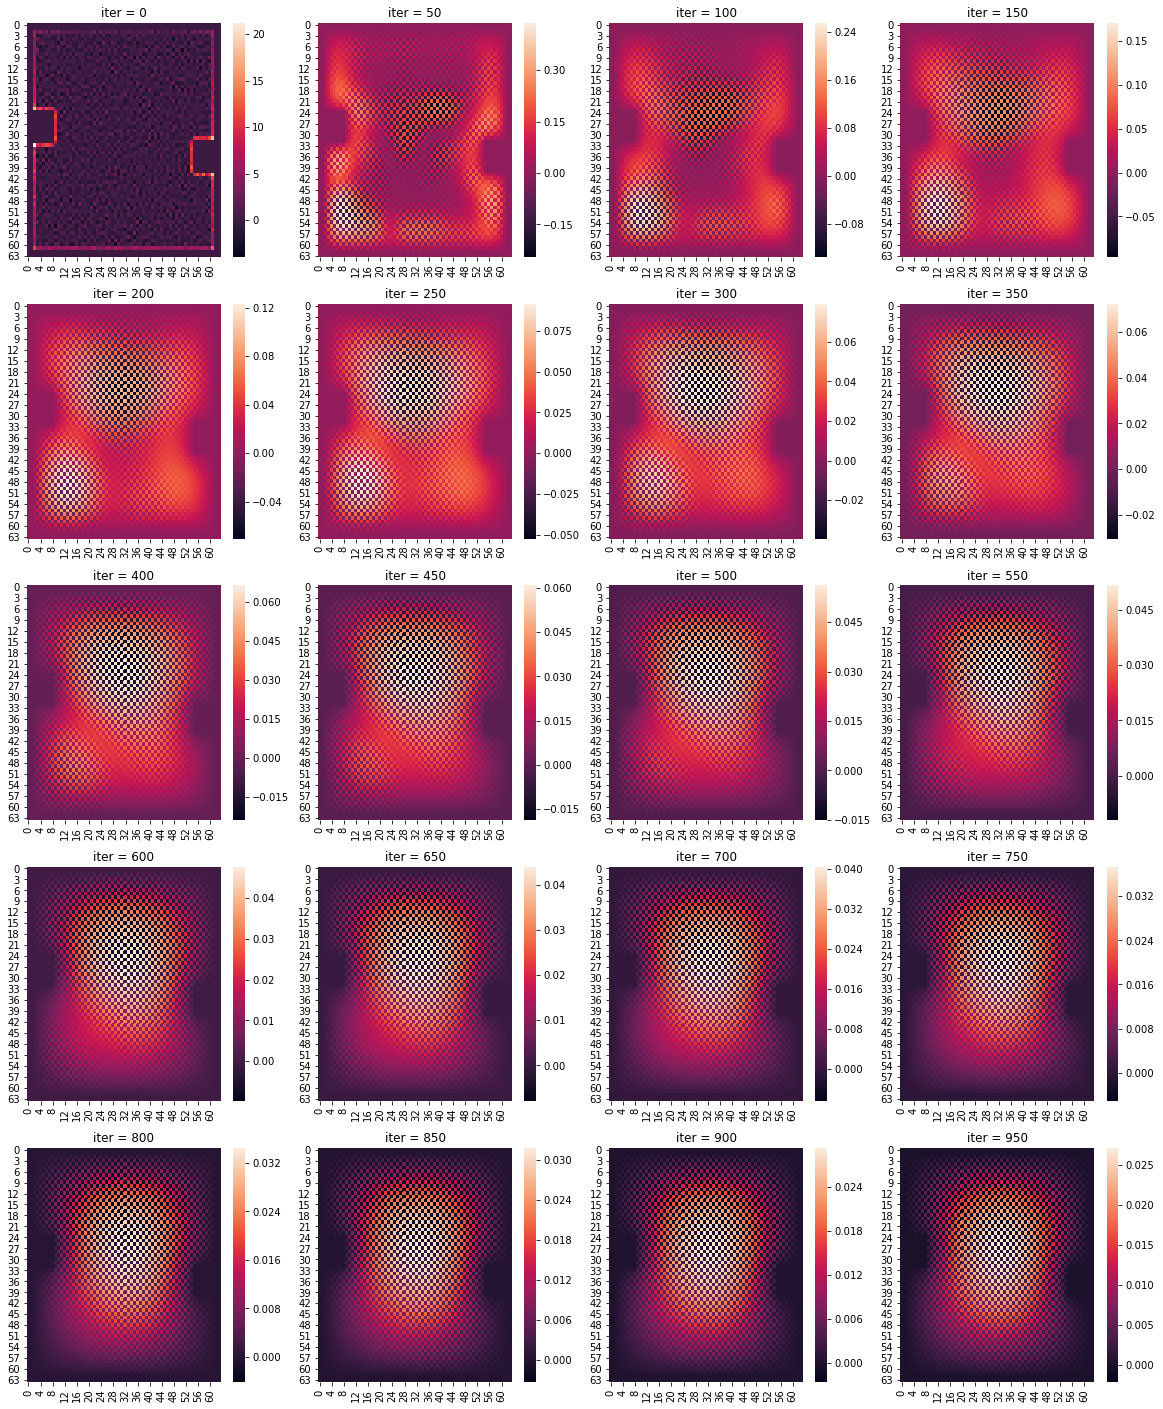

In [13]:
x_init = initgrid(64)

plt.figure(figsize=(20, 25))

for i in range(1000):    
            
    x = jacobi_step(x_init)
    error = x - x_init
    x_init = x
    
    if i % 50 == 0:
        plt.subplot(5, 4,i/50+1)
        sn.heatmap(error)
        plt.title('iter = %s' % i)

# Error got smoother and smoother!